In [5]:
# Step 1: Importing Libraries

# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning (scikit-learn)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix

# To save models
import joblib

# Set plot style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 5)

In [6]:
# Step 2: Loading Dataset

# Load dataset (update file path if needed)
df = pd.read_csv("top_insta_influencers_data.csv")

# Quick inspection
print("Shape of dataset:", df.shape)
print("\nFirst 5 rows:")
display(df.head())

print("\nColumn information:")
print(df.info())

print("\nSummary statistics:")
display(df.describe(include="all"))

Shape of dataset: (200, 10)

First 5 rows:


,rank,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
0,1,cristiano,92,3.3k,475.8m,8.7m,1.39%,6.5m,29.0b,Spain
1,2,kyliejenner,91,6.9k,366.2m,8.3m,1.62%,5.9m,57.4b,United States
2,3,leomessi,90,0.89k,357.3m,6.8m,1.24%,4.4m,6.0b,NaN
3,4,selenagomez,93,1.8k,342.7m,6.2m,0.97%,3.3m,11.5b,United States
4,5,therock,91,6.8k,334.1m,1.9m,0.20%,665.3k,12.5b,United States



Column information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   rank               200 non-null    int64 
 1   channel_info       200 non-null    object
 2   influence_score    200 non-null    int64 
 3   posts              200 non-null    object
 4   followers          200 non-null    object
 5   avg_likes          200 non-null    object
 6   60_day_eng_rate    200 non-null    object
 7   new_post_avg_like  200 non-null    object
 8   total_likes        200 non-null    object
 9   country            138 non-null    object
dtypes: int64(2), object(8)
memory usage: 15.8+ KB
None

Summary statistics:


,rank,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
count,200.000000,200,200.000000,200,200,200,200,200,200,138
unique,NaN,200,NaN,99,165,135,147,162,116,25
top,NaN,cristiano,NaN,10.0k,33.2m,1.1m,0.02%,0,1.6b,United States
freq,NaN,1,NaN,13,3,13,5,8,9,66
mean,100.500000,NaN,81.820000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,57.879185,NaN,8.878159,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,22.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,50.750000,NaN,80.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,100.500000,NaN,84.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,150.250000,NaN,86.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Step 3: Quick Inspection & Initial Cleaning

# Check for duplicates
duplicates = df.duplicated().sum()
print("Number of duplicate rows:", duplicates)

if duplicates > 0:
    df = df.drop_duplicates()
    print("Duplicates removed. New shape:", df.shape)

# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Percentage of missing values
print("\nPercentage of missing values per column:")
print((df.isnull().mean() * 100).round(2))

Number of duplicate rows: 0

Missing values in each column:
rank                  0
channel_info          0
influence_score       0
posts                 0
followers             0
avg_likes             0
60_day_eng_rate       0
new_post_avg_like     0
total_likes           0
country              62
dtype: int64

Percentage of missing values per column:
rank                  0.0
channel_info          0.0
influence_score       0.0
posts                 0.0
followers             0.0
avg_likes             0.0
60_day_eng_rate       0.0
new_post_avg_like     0.0
total_likes           0.0
country              31.0
dtype: float64


In [8]:
# Step 4: Converting String Columns to Numeric

# Function to clean and convert strings to numbers
def convert_to_number(value):
    if pd.isnull(value):
        return np.nan
    value = str(value).lower().replace(",", "").strip()
    if value.endswith("b"):
        return float(value[:-1]) * 1e9
    elif value.endswith("m"):
        return float(value[:-1]) * 1e6
    elif value.endswith("k"):
        return float(value[:-1]) * 1e3
    elif value.endswith("%"):
        return float(value[:-1])  # keep as percentage number
    else:
        try:
            return float(value)
        except:
            return np.nan

# Columns that need conversion
cols_to_convert = [
    "posts", "followers", "avg_likes",
    "60_day_eng_rate", "new_post_avg_like", "total_likes"
]

# Apply conversion
for col in cols_to_convert:
    df[col] = df[col].apply(convert_to_number)

# Check results
print(df[cols_to_convert].dtypes)
display(df[cols_to_convert].head())

posts                float64
followers            float64
avg_likes            float64
60_day_eng_rate      float64
new_post_avg_like    float64
total_likes          float64
dtype: object


,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes
0,3300.0,475800000.0,8700000.0,1.39,6500000.0,2.900000e+10
1,6900.0,366200000.0,8300000.0,1.62,5900000.0,5.740000e+10
2,890.0,357300000.0,6800000.0,1.24,4400000.0,6.000000e+09
3,1800.0,342700000.0,6200000.0,0.97,3300000.0,1.150000e+10
4,6800.0,334100000.0,1900000.0,0.20,665300.0,1.250000e+10


In [9]:
# Step 5: Fixing Data Types

int_cols = ["rank", "posts", "followers", "total_likes"]
for col in int_cols:
    # Convert to integer if not missing
    df[col] = df[col].dropna().astype(int)

float_cols = ["avg_likes", "60_day_eng_rate", "new_post_avg_like"]
for col in float_cols:
    df[col] = df[col].astype(float)

# Verify data types
print("\nData types after fixing:")
print(df.dtypes)


Data types after fixing:
rank                   int64
channel_info          object
influence_score        int64
posts                  int64
followers              int64
avg_likes            float64
60_day_eng_rate      float64
new_post_avg_like    float64
total_likes            int64
country               object
dtype: object


In [11]:
# Step 6: Handling Missing Values

# Numeric columns → fill with median (or mean, but median is safer for skewed data)
numeric_cols = df.select_dtypes(include=[np.number]).columns

for col in numeric_cols:
    df[col].fillna(df[col].median(), inplace=True)

# Categorical columns → fill with mode (most frequent value) or 'Unknown'
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mode()[0], inplace=True)

# Verify no missing values left
print("Missing values after treatment:\n")
print(df.isnull().sum())

Missing values after treatment:

rank                 0
channel_info         0
influence_score      0
posts                0
followers            0
avg_likes            0
60_day_eng_rate      0
new_post_avg_like    0
total_likes          0
country              0
dtype: int64


C:\Users\Sneha\AppData\Local\Temp\ipykernel_17724\1084151772.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


In [12]:
# Step 7: Creating Derived Features (Feature Engineering)

# Like-to-follower ratio
df["like_follower_ratio"] = df["total_likes"] / df["followers"]

# Post-to-follower ratio
df["post_follower_ratio"] = df["posts"] / df["followers"]

# Average likes ratio (avg_likes per follower)
df["avg_likes_ratio"] = df["avg_likes"] / df["followers"]

# Check new features
display(df[["like_follower_ratio", "post_follower_ratio", "avg_likes_ratio"]].head())

,like_follower_ratio,post_follower_ratio,avg_likes_ratio
0,60.949979,0.000007,0.018285
1,156.744948,0.000019,0.022665
2,16.792611,0.000002,0.019032
3,33.557047,0.000005,0.018092
4,37.413948,0.000020,0.005687


Summary Statistics:



,influence_score,followers,avg_likes,60_day_eng_rate,new_post_avg_like
count,200.000000,2.000000e+02,2.000000e+02,200.000000,2.000000e+02
mean,81.820000,7.740950e+07,1.787104e+06,1.896900,1.208132e+06
std,8.878159,7.368727e+07,2.193359e+06,3.322129,1.858322e+06
min,22.000000,3.280000e+07,6.510000e+04,0.010000,0.000000e+00
25%,80.000000,4.000000e+07,5.044000e+05,0.410000,1.957500e+05
50%,84.000000,5.005000e+07,1.100000e+06,0.880000,5.321500e+05
75%,86.000000,6.890000e+07,2.100000e+06,2.032500,1.325000e+06
max,93.000000,4.758000e+08,1.540000e+07,26.410000,1.260000e+07


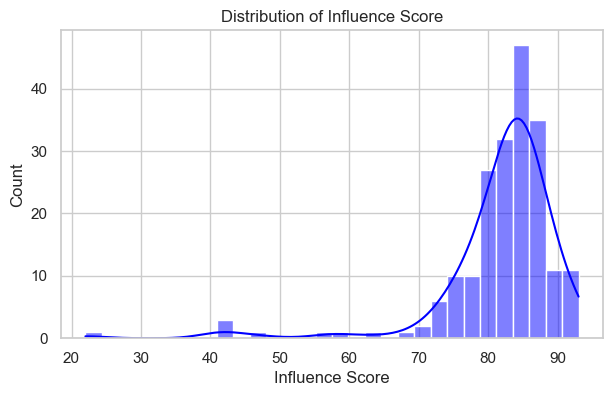

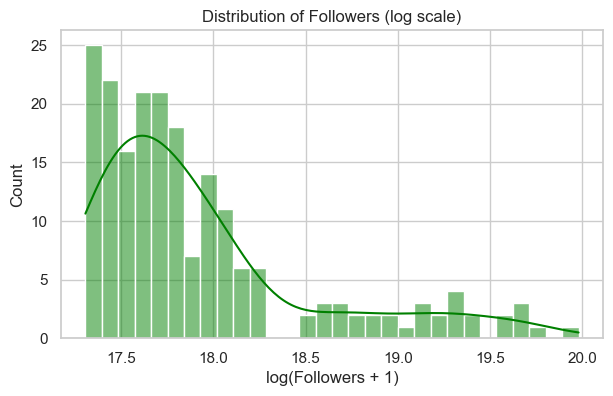

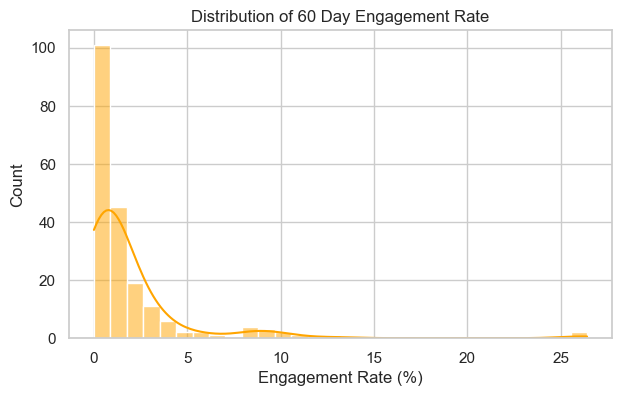

In [13]:
# Step 8: EDA - Summary Stats + Univariate Analysis

# Summary of key numeric columns
print("Summary Statistics:\n")
display(df[["influence_score", "followers", "avg_likes", 
            "60_day_eng_rate", "new_post_avg_like"]].describe())

# ---------- Univariate Distributions ----------

# Histogram - Influence Score
plt.figure(figsize=(7,4))
sns.histplot(df["influence_score"], bins=30, kde=True, color="blue")
plt.title("Distribution of Influence Score")
plt.xlabel("Influence Score")
plt.ylabel("Count")
plt.show()

# Histogram - Followers (log scale for readability)
plt.figure(figsize=(7,4))
sns.histplot(np.log1p(df["followers"]), bins=30, kde=True, color="green")
plt.title("Distribution of Followers (log scale)")
plt.xlabel("log(Followers + 1)")
plt.ylabel("Count")
plt.show()

# Histogram - 60 Day Engagement Rate
plt.figure(figsize=(7,4))
sns.histplot(df["60_day_eng_rate"], bins=30, kde=True, color="orange")
plt.title("Distribution of 60 Day Engagement Rate")
plt.xlabel("Engagement Rate (%)")
plt.ylabel("Count")
plt.show()

C:\Users\Sneha\AppData\Local\Temp\ipykernel_17724\2267405303.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette="viridis")


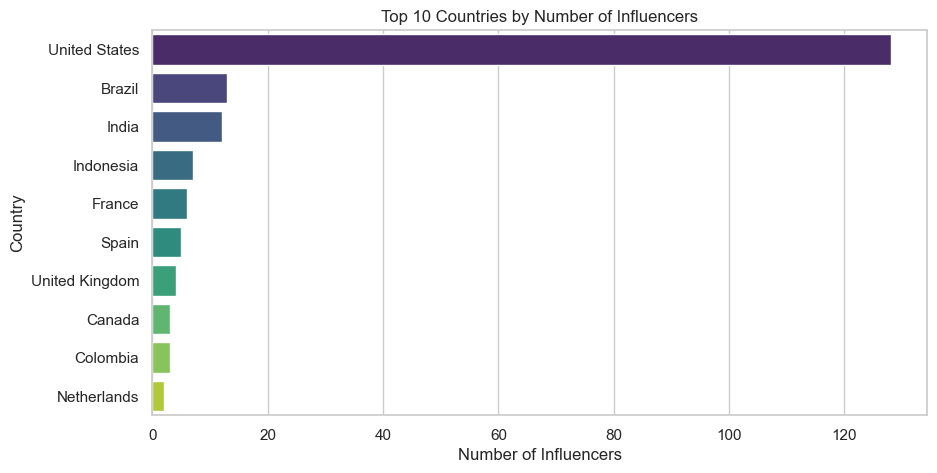

C:\Users\Sneha\AppData\Local\Temp\ipykernel_17724\2267405303.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="followers", y="channel_info", data=top_by_followers, palette="mako")


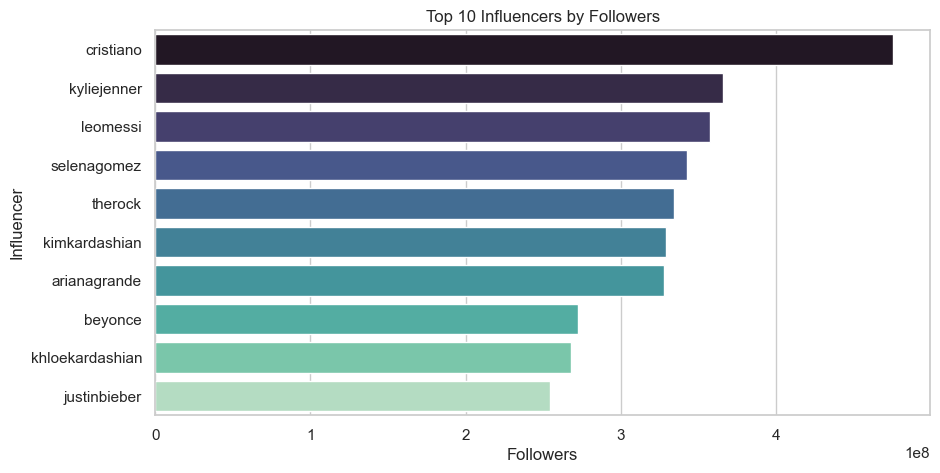

C:\Users\Sneha\AppData\Local\Temp\ipykernel_17724\2267405303.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="influence_score", y="channel_info", data=top_by_score, palette="rocket")


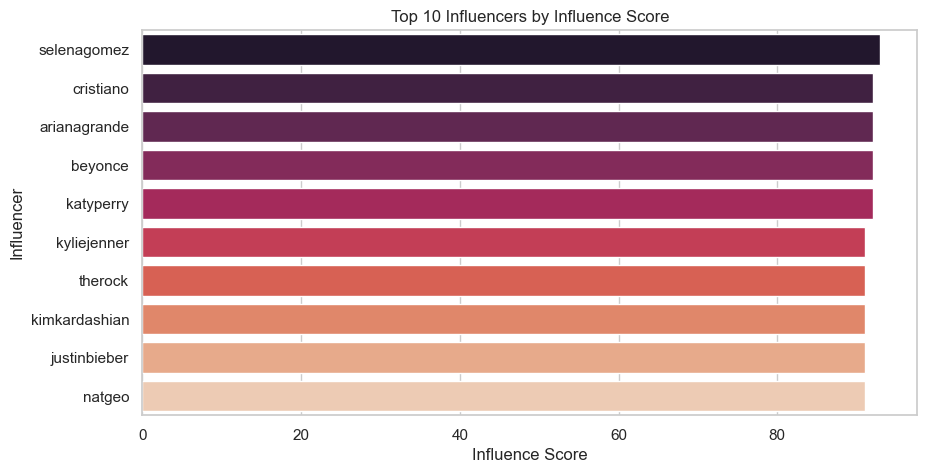

In [14]:
# Step 9: EDA - Categorical & Top Influencers

# Country Distribution
plt.figure(figsize=(10,5))
top_countries = df["country"].value_counts().head(10)
sns.barplot(x=top_countries.values, y=top_countries.index, palette="viridis")
plt.title("Top 10 Countries by Number of Influencers")
plt.xlabel("Number of Influencers")
plt.ylabel("Country")
plt.show()

# Top 10 Influencers by Followers
top_by_followers = df.nlargest(10, "followers")[["channel_info", "followers"]]

plt.figure(figsize=(10,5))
sns.barplot(x="followers", y="channel_info", data=top_by_followers, palette="mako")
plt.title("Top 10 Influencers by Followers")
plt.xlabel("Followers")
plt.ylabel("Influencer")
plt.show()

# Top 10 Influencers by Influence Score
top_by_score = df.nlargest(10, "influence_score")[["channel_info", "influence_score"]]

plt.figure(figsize=(10,5))
sns.barplot(x="influence_score", y="channel_info", data=top_by_score, palette="rocket")
plt.title("Top 10 Influencers by Influence Score")
plt.xlabel("Influence Score")
plt.ylabel("Influencer")
plt.show()

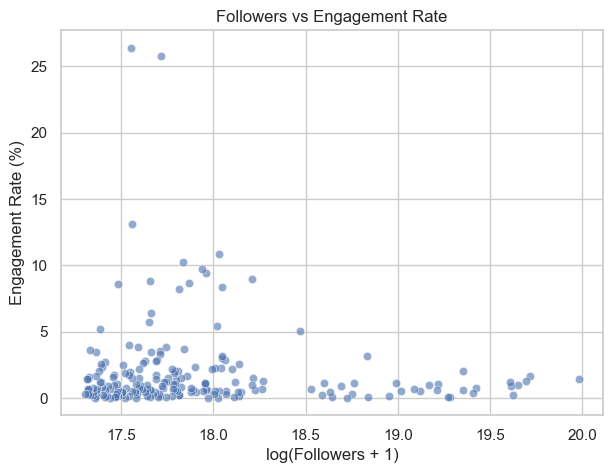

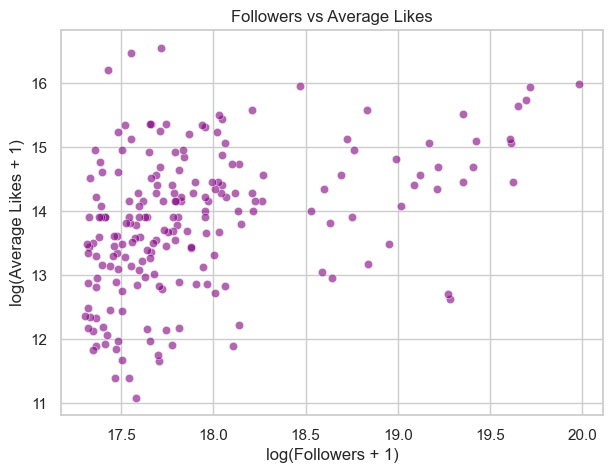

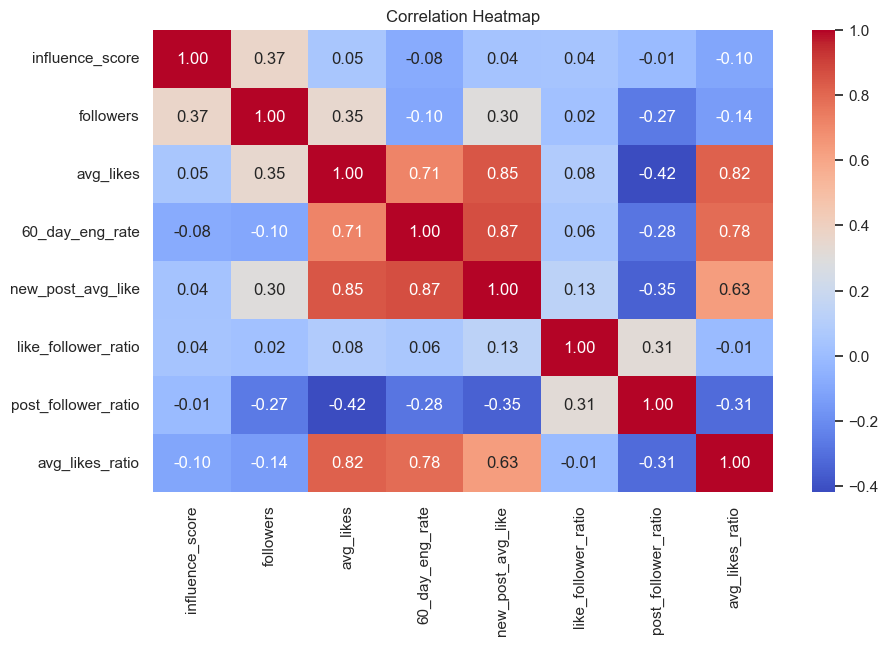

In [15]:
# Step 10: EDA - Bivariate Analysis

# ---------- Followers vs Engagement Rate ----------
plt.figure(figsize=(7,5))
sns.scatterplot(x=np.log1p(df["followers"]), y=df["60_day_eng_rate"], alpha=0.6)
plt.title("Followers vs Engagement Rate")
plt.xlabel("log(Followers + 1)")
plt.ylabel("Engagement Rate (%)")
plt.show()

# ---------- Followers vs Average Likes ----------
plt.figure(figsize=(7,5))
sns.scatterplot(x=np.log1p(df["followers"]), y=np.log1p(df["avg_likes"]), alpha=0.6, color="purple")
plt.title("Followers vs Average Likes")
plt.xlabel("log(Followers + 1)")
plt.ylabel("log(Average Likes + 1)")
plt.show()

# ---------- Correlation Heatmap ----------
plt.figure(figsize=(10,6))
corr = df[["influence_score","followers","avg_likes",
           "60_day_eng_rate","new_post_avg_like",
           "like_follower_ratio","post_follower_ratio","avg_likes_ratio"]].corr()

sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap")
plt.show()

In [24]:
# Step 11: Defining Target Variable

# We'll predict "influence_score" (regression problem)
target = "influence_score"

# Features we will use (can be adjusted later)
features = [
    "followers", "avg_likes", "60_day_eng_rate", "new_post_avg_like",
    "like_follower_ratio", "post_follower_ratio", "avg_likes_ratio"
]

# Optional categorical feature: 'country'
# We'll add encoding later if we want to use it
X = df[features]
y = df[target]

print("Features used for modeling:", features)
print("Target variable:", target)

Features used for modeling: ['followers', 'avg_likes', '60_day_eng_rate', 'new_post_avg_like', 'like_follower_ratio', 'post_follower_ratio', 'avg_likes_ratio']
Target variable: influence_score


In [25]:
# Step 12: Feature Encoding + Train/Test Split

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# If we want to include 'country' as a feature, encode it
if "country" in df.columns:
    le = LabelEncoder()
    df["country_encoded"] = le.fit_transform(df["country"].astype(str))
    X["country_encoded"] = df["country_encoded"]

# Train-Test Split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (160, 8)
Testing set shape: (40, 8)


C:\Users\Sneha\AppData\Local\Temp\ipykernel_17724\913636494.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["country_encoded"] = df["country_encoded"]


In [26]:

# Step 13: Feature Scaling

from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Fit on training data, transform both train & test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Feature scaling completed!")
print("X_train_scaled shape:", X_train_scaled.shape)
print("X_test_scaled shape:", X_test_scaled.shape)

Feature scaling completed!
X_train_scaled shape: (160, 8)
X_test_scaled shape: (40, 8)


In [27]:
# Step 14: Model Training

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Linear Regression 
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)  # Random Forest does not need scaled data

RandomForestRegressor(random_state=42)

In [28]:
# Step 15: Model Evaluation

from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Linear Regression Predictions
y_pred_lin = lin_reg.predict(X_test_scaled)

mse_lin = mean_squared_error(y_test, y_pred_lin)
rmse_lin = np.sqrt(mse_lin)
r2_lin = r2_score(y_test, y_pred_lin)

print("📌 Linear Regression Performance")
print("MSE :", mse_lin)
print("RMSE:", rmse_lin)
print("R²   :", r2_lin)
print("-" * 40)

# Random Forest Predictions
y_pred_rf = rf_reg.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("📌 Random Forest Regressor Performance")
print("MSE :", mse_rf)
print("RMSE:", rmse_rf)
print("R²   :", r2_rf)

📌 Linear Regression Performance
MSE : 160.46938569370704
RMSE: 12.667651151405577
R²   : 0.05086662978610379
----------------------------------------
📌 Random Forest Regressor Performance
MSE : 168.31248
RMSE: 12.973529974528907
R²   : 0.004476830886729122


,Feature,Importance
0,followers,0.474786
4,like_follower_ratio,0.116762
6,avg_likes_ratio,0.091964
5,post_follower_ratio,0.083314
7,country_encoded,0.061571
1,avg_likes,0.060412
2,60_day_eng_rate,0.058872
3,new_post_avg_like,0.052319


C:\Users\Sneha\AppData\Local\Temp\ipykernel_17724\1596923424.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feat_importances, palette="viridis")


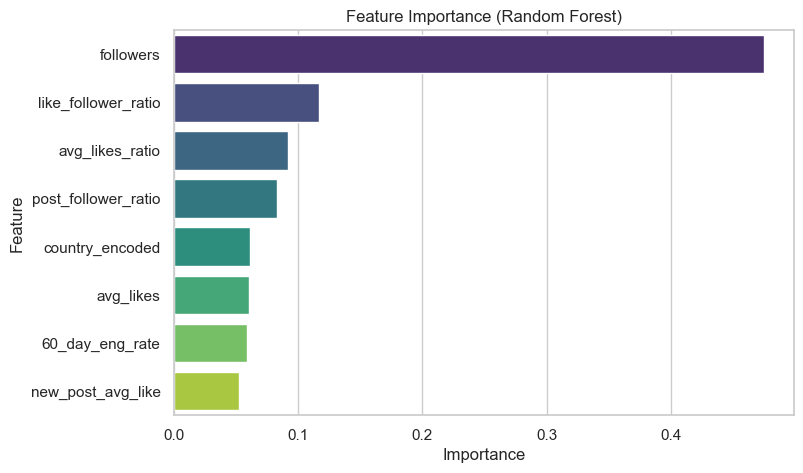

In [29]:
# Step 16: Model Interpretation - Feature Importance

# Get feature importances from Random Forest
importances = rf_reg.feature_importances_
feature_names = X.columns

# Create a DataFrame for better visualization
feat_importances = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# Display table
display(feat_importances)

# Plot feature importance
plt.figure(figsize=(8,5))
sns.barplot(x="Importance", y="Feature", data=feat_importances, palette="viridis")
plt.title("Feature Importance (Random Forest)")
plt.show()

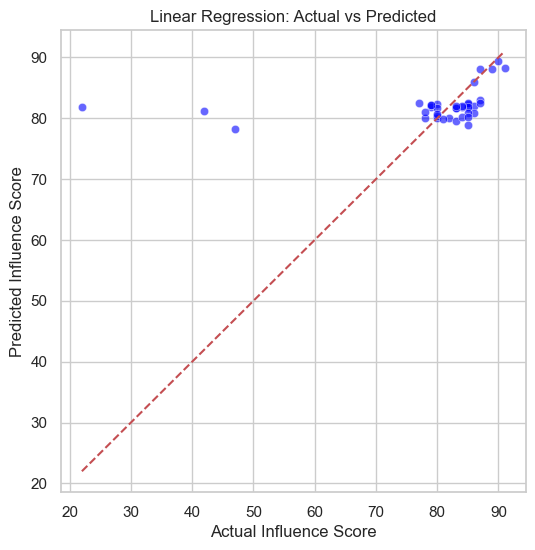

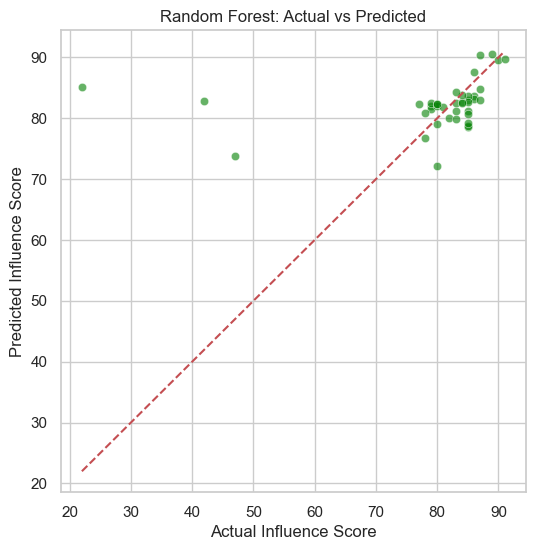

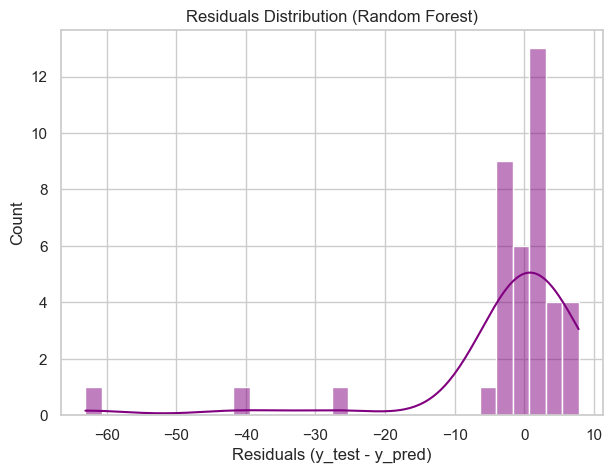

In [30]:
# Step 17: Visualizing Predictions

# Linear Regression
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred_lin, alpha=0.6, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # y=x line
plt.title("Linear Regression: Actual vs Predicted")
plt.xlabel("Actual Influence Score")
plt.ylabel("Predicted Influence Score")
plt.show()

# Random Forest
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.6, color="green")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("Random Forest: Actual vs Predicted")
plt.xlabel("Actual Influence Score")
plt.ylabel("Predicted Influence Score")
plt.show()

# Residuals Plot (Random Forest)
residuals = y_test - y_pred_rf

plt.figure(figsize=(7,5))
sns.histplot(residuals, bins=30, kde=True, color="purple")
plt.title("Residuals Distribution (Random Forest)")
plt.xlabel("Residuals (y_test - y_pred)")
plt.ylabel("Count")
plt.show()

Category distribution:
 engagement_category
Low       106
Medium     64
High       30
Name: count, dtype: int64

📌 Classification Report:
              precision    recall  f1-score   support

        High       1.00      1.00      1.00         6
         Low       1.00      1.00      1.00        21
      Medium       1.00      1.00      1.00        13

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



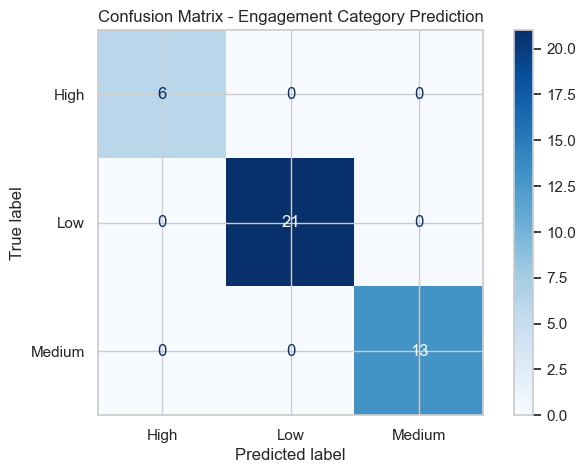

In [31]:
# Step 18: Classification Variant (Optional)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Step 18.1: Create Engagement Rate Categories
def categorize_engagement(rate):
    if rate < 1:
        return "Low"
    elif rate < 3:
        return "Medium"
    else:
        return "High"

df["engagement_category"] = df["60_day_eng_rate"].apply(categorize_engagement)

print("Category distribution:\n", df["engagement_category"].value_counts())

# Step 18.2: Features & Target
X_cls = df[features]  # same features from regression
y_cls = df["engagement_category"]

# Split data
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X_cls, y_cls, test_size=0.2, random_state=42, stratify=y_cls
)

# Scale features
X_train_c_scaled = scaler.fit_transform(X_train_c)
X_test_c_scaled = scaler.transform(X_test_c)

# Step 18.3: Train Classifier
rf_cls = RandomForestClassifier(n_estimators=100, random_state=42)
rf_cls.fit(X_train_c, y_train_c)

# Step 18.4: Evaluate
y_pred_c = rf_cls.predict(X_test_c)

print("\n📌 Classification Report:")
print(classification_report(y_test_c, y_pred_c))

# Confusion Matrix
cm = confusion_matrix(y_test_c, y_pred_c, labels=rf_cls.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_cls.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Engagement Category Prediction")
plt.show()

In [32]:
# Step 19: Saving Model & Artifacts

import joblib

# Save regression models
joblib.dump(lin_reg, "linear_regression_model.joblib")
joblib.dump(rf_reg, "random_forest_regressor_model.joblib")

# Save classification model
joblib.dump(rf_cls, "random_forest_classifier_model.joblib")

# Save scaler
joblib.dump(scaler, "scaler.joblib")

print("✅ Models and scaler saved successfully!")

✅ Models and scaler saved successfully!
